In [122]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE,r2_score as r2
from yellowbrick.regressor import ResidualsPlot

In [53]:
#loading the dataset
data = pd.read_csv("unzipped_folder/Salary.csv")
data.head() # prints the first 5 datapoints

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [130]:
#data inspection
data.describe() # gives statistical summary
data.info() # gives summary of the structure of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [135]:
data.isnull().sum() # checks if there is any null values
data.shape # prints the (no of columns, no of rows)
data.dtypes # prints the datatype

(35, 2)

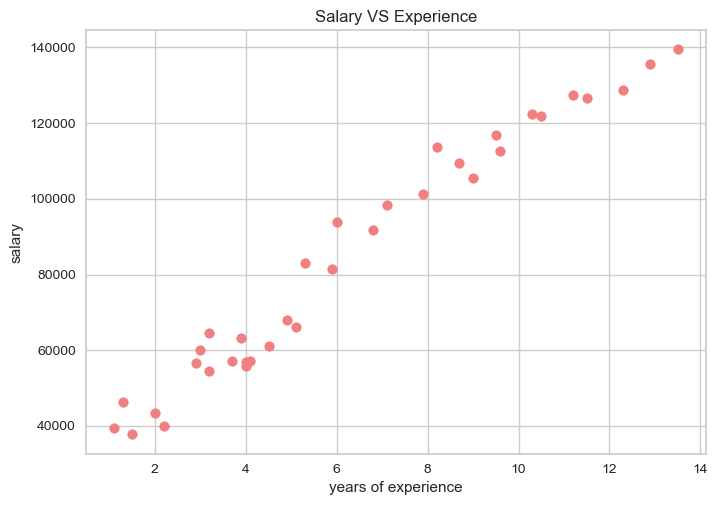

In [132]:
#data visualiation
# scatterplot of salary vs years experience to visually confirm there exists a linear relationship between them
plt.scatter(data['YearsExperience'], data['Salary'], color = 'lightcoral')
plt.title('Salary VS Experience')
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.show()

In [133]:
#splitting variables
X = data[['Salary']]
y = data[['YearsExperience']]

In [67]:
#splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [69]:
#Regressor model 
model = LinearRegression()


In [70]:
#training the model and learning the relationship between salary and years of experience 
model.fit(X_train,y_train)

LinearRegression()

In [73]:
#predicting the output of X values of train and test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [81]:
#evaluation metrics - RMSE
RMSE_train = np.sqrt(MSE(y_train, y_pred_train))
RMSE_test = np.sqrt(MSE(y_test, y_pred_test))
print(f"RMSE(train):{RMSE_train}")
print(f"RMSE(test):{RMSE_test}")

RMSE(train):0.7175944563599808
RMSE(test):0.4032149839077716


In [87]:
#evaluation metrics - R2
score_train = r2(y_train, y_pred_train)
score_test = r2(y_test, y_pred_test)
print(f"R2(train):{score_train}")
print(f"R2(test):{score_test}")

R2(train):0.9638371903672509
R2(test):0.972640518445156


In [90]:
#Regressor coefficient and intercept
print(f"coefficient: {model.coef_}")
print(f"intercept: {model.intercept_}")

coefficient: [[0.00011169]]
intercept: [-3.06726732]


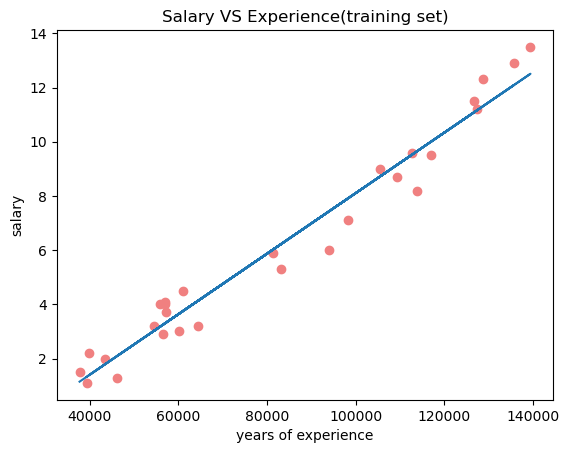

In [94]:
# scatterplot of salary vs years experience on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train)
plt.title('Salary VS Experience(training set)')
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.show()

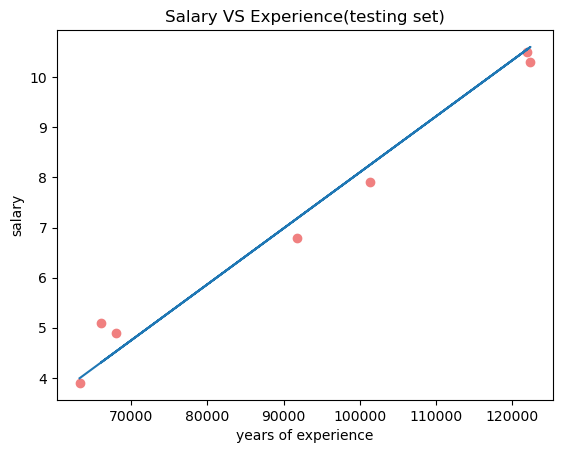

In [96]:
# scatterplot of salary vs years experience on testing set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_test, y_pred_test)
plt.title('Salary VS Experience(testing set)')
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.show()

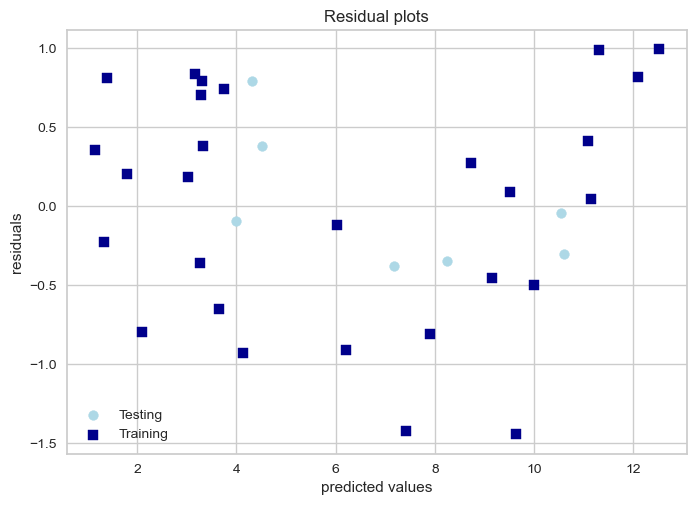

In [128]:
#residual plot
residuals_test = y_test - y_pred_test
residuals_train=  y_train - y_pred_train
plt.scatter(y_pred_test, residuals_test, color = 'lightblue', marker = 'o',label = 'Testing')
plt.scatter(y_pred_train, residuals_train, color = 'darkblue', marker = 's', label = 'Training')
plt.legend()
plt.title('Residual plots')
plt.xlabel("predicted values")
plt.ylabel("residuals")
plt.show()
